# Project: Write a Data Sceince blog post

In this project data has been fetched from the Kaggle website

#### Data set details

Data set          : India - Trade data

Data Credit       : Kaggle

Brief description : Trade statistics of India for export and import of commodities from 1996-2018

In [254]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

## 1. Business Understanding

Being an Indian, i always would like to see what major factors are driving Indian economy and how fast the growth is happening on regular interval.

Thanks to Kaggle datasets, i found the data related to Indian export and import trade value with commodity name and the corresponding value in US$ million.

With this data i would like to focus on 

1) What are the countries that are heavily relying on India and vice versa?

2) What are the top commodities that India getting profitted from and vice versa?

3) Progress over years (Since 2000 till 2018) on both the Import and Export front as well.

## 2. Data Understanding

Now, let us read the data and do basic checks

In [255]:
# Import the data (Two files - one for Export and other for Import)
df_import = pd.read_csv("Input/2018-2010_import.csv")
df_export = pd.read_csv("Input/2018-2010_export.csv")
print('Shape of the Import data'+str(df_import.shape)+ "\n" + 'Shape of the Export data'+str(df_export.shape))

Shape of the Import data(93095, 5)
Shape of the Export data(137023, 5)


In [256]:
# Print first few observations
df_import.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [257]:
# Print first few observations
df_export.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [258]:
# Checking the data format of each column
print(str(df_import.info()) +str(df_export.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB
NoneNone


Both the files contains 5 columns information, majorly holding HSCode stands for Harmonized System code, Commodity name from HS system, Value, Country and Year of the export / Import.

Value appeared to be missing in both the files (Might be due to less data coverage)

In [259]:
# Checking the missing values
print("- For Import data - \n"+str(df_import.isnull().sum()) +"\n\n"+ "- For Export data - \n"+str(df_export.isnull().sum()))

- For Import data - 
HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64

- For Export data - 
HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64


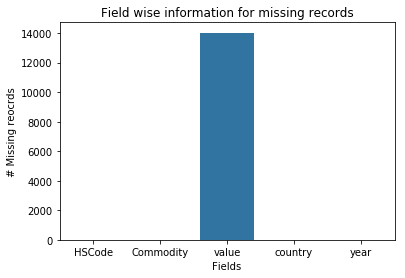

In [260]:
# Graphical representation of the missing values from Import data set
na_counts = df_import.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xlabel('Fields')
plt.ylabel('# Missing reocrds')
plt.title('Field wise information for missing records');

In [261]:
# Checking the distribution of the numerical columns
print("- For Import data - \n"+str(df_import.describe()) +"\n\n"+ "- For Export data - \n"+str(df_export.describe()))

- For Import data - 
             HSCode         value          year
count  93095.000000  79068.000000  93095.000000
mean      53.849573     63.289855   2014.654740
std       27.567486    666.652363      2.702373
min        1.000000      0.000000   2010.000000
25%       30.000000      0.030000   2012.000000
50%       54.000000      0.380000   2015.000000
75%       78.000000      4.910000   2017.000000
max       99.000000  32781.570000   2018.000000

- For Export data - 
              HSCode          value           year
count  137023.000000  122985.000000  137023.000000
mean       51.330302      21.567829    2014.056304
std        28.018026     229.701279       2.580160
min         1.000000       0.000000    2010.000000
25%        28.000000       0.030000    2012.000000
50%        52.000000       0.360000    2014.000000
75%        74.000000       3.770000    2016.000000
max        99.000000   19805.170000    2018.000000


Based on the above description of the values, we can see that Year is captured between 2010 and 2018 only

Value has a wide range from 0 till 32k or 19k (for Import and Export)

HS Code is ranging from 1 till 99 only

## 3. Prepare Data

Since the data is clean and ready to use no need to drop any unused columns.

But, we may need to check on areas like

1) Duplicate values 

2) Unknown or missing country names

3) Missing value for Export / Import value

In [262]:
# Checking the duplicate values in both the files
print("- For Import data - \n"+str(df_import.duplicated().sum()) +"\n\n"+ "- For Export data - \n"+str(df_export.duplicated().sum()))

- For Import data - 
18002

- For Export data - 
0


In [263]:
# Checking on the missing values of imported value
df_import[df_import['value'].isnull()].head()

,HSCode,Commodity,value,country,year
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018
10,39,PLASTIC AND ARTICLES THEREOF.,NaN,AFGHANISTAN TIS,2018
12,49,"PRINTED BOOKDS, NEWSPAPERS, PICTURES AND OTHER...",NaN,AFGHANISTAN TIS,2018
21,82,"TOOLS IMPLEMENTS, CUTLERY, SPOONS AND FORKS, O...",NaN,AFGHANISTAN TIS,2018
26,97,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,NaN,AFGHANISTAN TIS,2018


In [264]:
# Checking on the missing values of exported value
df_export[df_export['value'].isnull()].head()

,HSCode,Commodity,value,country,year
11,14,VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUC...,NaN,AFGHANISTAN TIS,2018
36,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,NaN,AFGHANISTAN TIS,2018
44,53,OTHER VEGETABLE TEXTILE FIBRES; PAPER YARN AND...,NaN,AFGHANISTAN TIS,2018
57,66,"UMBRELLAS, SUN UMBRELLAS, WALKING-STICKS, SEAT...",NaN,AFGHANISTAN TIS,2018
68,79,ZINC AND ARTICLES THEREOF.,NaN,AFGHANISTAN TIS,2018


Would like to check further on the country level as well how many coutries are having missing values of value of export

In [265]:
# Distribution of the records which are having null value at country level 
pd.DataFrame(df_export[df_export['value'].isnull()]).country.value_counts()

MACAO                                       151
ST LUCIA                                    125
SWAZILAND                                   120
UNSPECIFIED                                 118
GUINEA BISSAU                               117
DOMINICA                                    117
BELIZE                                      117
MONTSERRAT                                  116
C AFRI REP                                  112
KYRGHYZSTAN                                 112
MARTINIQUE                                  111
BAHAMAS                                     111
UNION OF SERBIA & MONTENEGRO                110
ARUBA                                       110
MOLDOVA                                     109
GRENADA                                     109
BR VIRGN IS                                 108
COMOROS                                     107
TURKMENISTAN                                107
TAJIKISTAN                                  106
BOSNIA-HRZGOVIN                         

From the above distribution, we can see that there is one entry in country name with "UNSPECIFIED". We would need treat this as well

In [266]:
# Country names distribution
df_import.country.value_counts()

BELGIUM            1143
AUSTRALIA          1095
U S A              1075
ITALY              1069
GERMANY            1069
CHINA P RP         1064
U K                1063
FRANCE             1060
SINGAPORE          1051
THAILAND           1050
SPAIN              1049
NETHERLAND         1048
U ARAB EMTS        1047
BRAZIL             1044
AUSTRIA            1040
JAPAN              1038
KOREA RP           1030
MALAYSIA           1020
CANADA             1019
HONG KONG          1002
TURKEY              994
TAIWAN              989
INDONESIA           987
VIETNAM SOC REP     985
DENMARK             982
UNSPECIFIED         979
SRI LANKA DSR       975
SWITZERLAND         973
SOUTH AFRICA        970
BANGLADESH PR       968
                   ... 
GREENLAND            31
FAROE IS.            31
ST PIERRE            27
NIUE IS              27
TUVALU               25
VANUATU REP          25
WALLIS F IS          24
FALKLAND IS          24
TONGA                23
GIBRALTAR            22
VATICAN CITY    

In [267]:
#Check the number of unspecified countries
print("- For Import data - \n"+str(df_import[df_import['country']=='UNSPECIFIED']['country'].count()) +"\n\n"
      + "- For Export data - \n"+str(df_export[df_export['country']=='UNSPECIFIED']['country'].count()))

- For Import data - 
979

- For Export data - 
726


In [268]:
# Check whether the unspecified countries hold any value associated with Export or Import
print("- For Import data - \n"+str(df_import[df_import['country']=='UNSPECIFIED']['value'].sum()) +"\n\n"
      + "- For Export data - \n"+str(df_export[df_export['country']=='UNSPECIFIED']['value'].sum()))

- For Import data - 
53562.520000000004

- For Export data - 
62259.890000000014


Since these are having significant value, it is not good idea to drop them, rather we can use this

In [269]:
# We need to clean the dataset with related to value = 0 and removing the duplicates
def df_clean(df):   
    df = df[df['value']!=0]
    df.dropna(inplace=True)
#     df.year = pd.Categorical(df.year)
    df.drop_duplicates(keep="first",inplace=True)
    return df

In [270]:
# Create copies of Import and export and then apply the cleaning function
df_import1=df_import.copy()
df_export1=df_export.copy()

In [271]:
df_import1=df_clean(df_import1)
df_export1=df_clean(df_export1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [272]:
# Check once back with criteria
# Check the Duplicates in the data set
print("- For Import data - \n"+str(df_import1.duplicated().sum()) +"\n\n"+ "- For Export data - \n"+str(df_export1.duplicated().sum()))

- For Import data - 
0

- For Export data - 
0


In [273]:
# Check for the null values in the column value
print("- For Import data - \n"+str(df_import1.isnull().sum()) +"\n\n"+ "- For Export data - \n"+str(df_export1.isnull().sum()))

- For Import data - 
HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

- For Export data - 
HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64


### 4. Answer Questions based on dataset

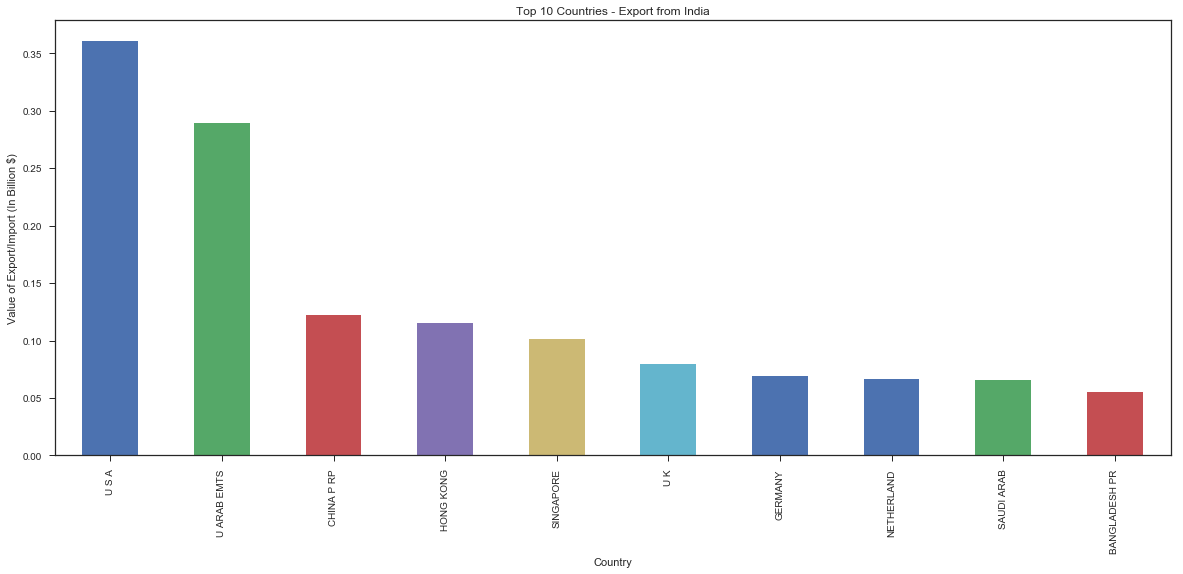

In [450]:
# 1) What are the countries that are heavily relying on India?
# Since the unspecified country is also being listed, remove that and show the graph
plt.figure(figsize = (20,8))
df_export1['value']=df_export1['value']/1000
df_export1[df_export1['country']!='UNSPECIFIED'].groupby('country')['value'].sum().nlargest(10).plot('bar')
plt.xlabel('Country')
plt.ylabel('Value of Export/Import (In Billion $)')
plt.title('Top 10 Countries - Export from India');

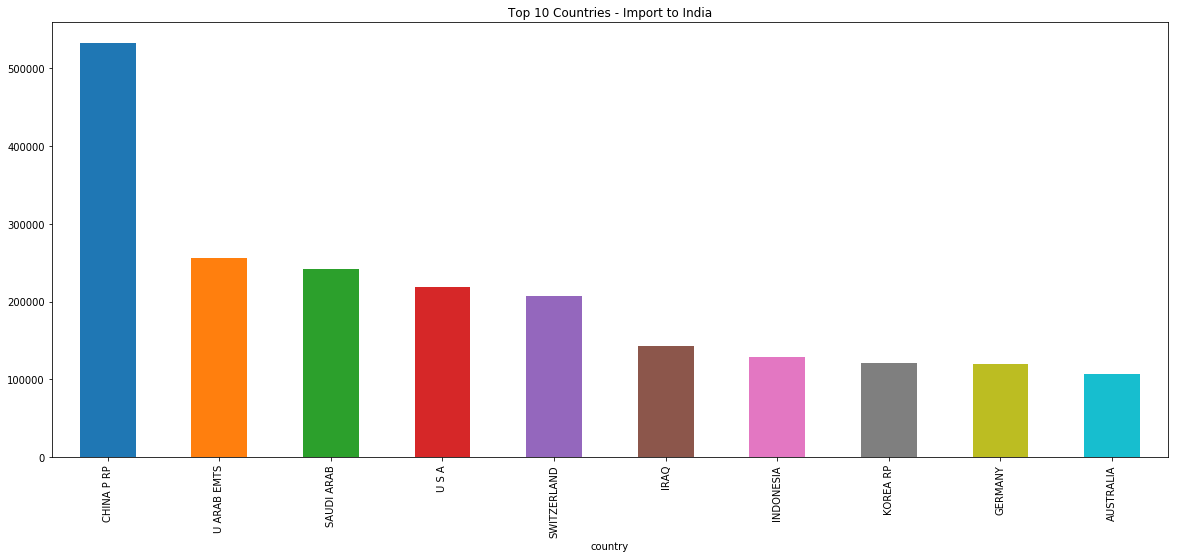

In [275]:
# 1) What are the countries on which India being relied upon?
plt.figure(figsize = (20,8))
df_import1.groupby('country')['value'].sum().nlargest(10).plot('bar')
plt.title('Top 10 Countries - Import to India');

Let us take a look at the countries to which India is exporting commodities alot by checking whether India is getting import from those and if so, how much

In [343]:
# Create data frames to have the data at country and type of business level
country_import=df_import1.groupby('country')['value'].sum().reset_index()
country_import['Type']='Import'
country_export=df_export1.groupby('country')['value'].sum().reset_index()
country_export['Type']='Export'
country_wise=country_export.append(country_import)
country_wise['Type'].value_counts()

Export    247
Import    241
Name: Type, dtype: int64

In [407]:
val_df=country_wise.groupby(['country', 'Type'])['value'].sum().reset_index()

In [365]:
export_ctr=df_export1[df_export1['country']!='UNSPECIFIED'].groupby('country')['value'].sum().nlargest(10).reset_index()
export_ctr

,country,value
0,U S A,360609.57
1,U ARAB EMTS,289374.88
2,CHINA P RP,121806.00
3,HONG KONG,115693.35
4,SINGAPORE,101679.70
5,U K,79942.61
6,GERMANY,68855.45
7,NETHERLAND,66581.17
8,SAUDI ARAB,65995.99
9,BANGLADESH PR,55472.64


In [400]:
exp_imp_top=pd.merge(val_df,export_ctr,on='country',how='inner')
exp_imp_top['value_x']=exp_imp_top['value_x']/1000
exp_imp_top

,country,Type,value_x,value_y
0,BANGLADESH PR,Export,55.47264,55472.64
1,BANGLADESH PR,Import,5.93644,55472.64
2,CHINA P RP,Export,121.80600,121806.00
3,CHINA P RP,Import,532.17751,121806.00
4,GERMANY,Export,68.85545,68855.45
5,GERMANY,Import,119.66464,68855.45
6,HONG KONG,Export,115.69335,115693.35
7,HONG KONG,Import,83.54274,115693.35
8,NETHERLAND,Export,66.58117,66581.17
9,NETHERLAND,Import,23.12204,66581.17


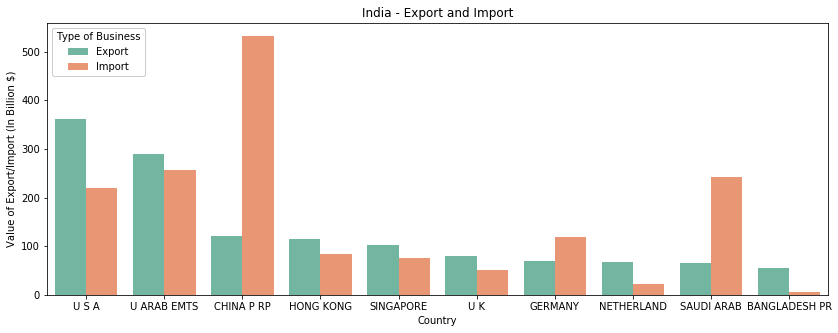

In [403]:
# Plot a Bar chart to see the how the top 10 export nations are doing business with India related to Import
plt.figure(figsize = [14, 5])
exp_imp_top=exp_imp_top.sort_values(['value_y','Type'],ascending=[False,True])
sb.barplot(x='country', y='value_x', hue='Type', data=exp_imp_top,palette="Set2");
plt.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Type of Business')
plt.xlabel('Country')
plt.ylabel('Value of Export/Import (In Billion $)')
plt.title('India - Export and Import');

From the above bar graph we can notice that, Even though India is exporting most of it's commodities to these countries, at the same time India is relying heavily on countries like China, USA and UAE & Saudi arabia.

Further, we can check what is that India getting importing from China and Saudi Arabia

In [456]:
# Look at china data
china = df_import1[df_import1['country']=='CHINA P RP']
china.head()

,HSCode,Commodity,value,country,year
1390,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.94,CHINA P RP,2018
1392,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",2.47,CHINA P RP,2018
1393,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,3.77,CHINA P RP,2018
1394,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,50.11,CHINA P RP,2018
1395,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,6.53,CHINA P RP,2018


In [458]:
china.groupby(['year'])['value'].sum()

year
2010    43479.39
2011    55313.17
2012    52247.97
2013    51034.30
2014    60412.84
2015    61707.54
2016    61282.66
2017    76380.35
2018    70319.29
Name: value, dtype: float64

In [464]:
china_c=china.groupby(['Commodity'])['value'].sum().reset_index()
china_c['value']=china_c['value']/1000
china_c.sort_values('value',ascending=False)

,Commodity,value
23,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,162.03310
54,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",96.04907
58,ORGANIC CHEMICALS,52.28081
26,FERTILISERS.,19.83760
73,PROJECT GOODS; SOME SPECIAL USES.,18.46548
35,IRON AND STEEL,15.77612
65,PLASTIC AND ARTICLES THEREOF.,14.70618
7,ARTICLES OF IRON OR STEEL,12.43882
56,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",10.72441
92,VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...,10.05933


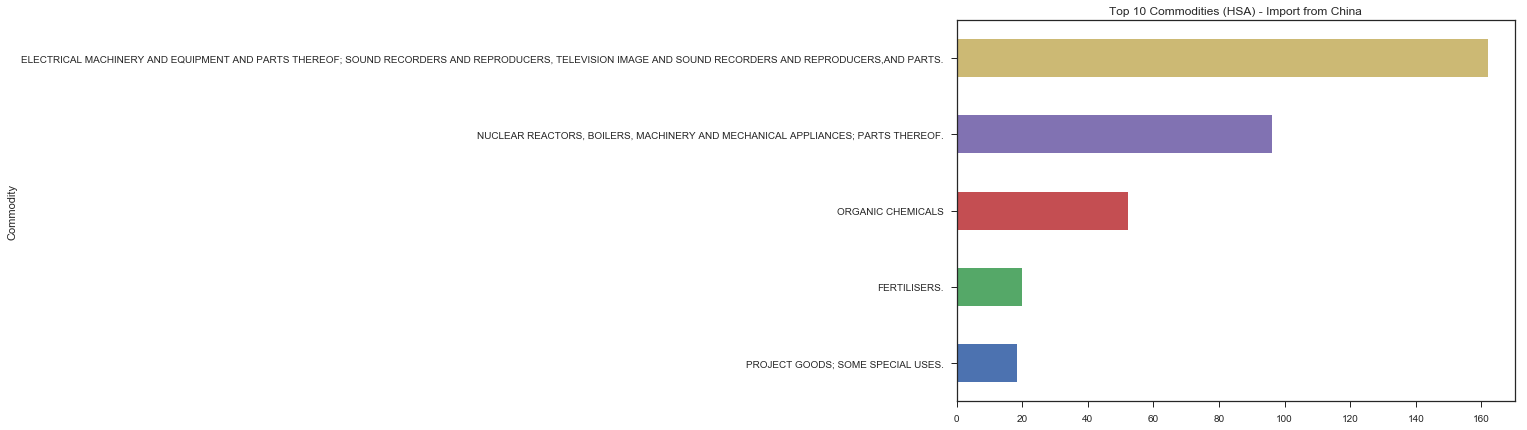

In [466]:
plt.figure(figsize = (10,7))
china_c.groupby('Commodity')['value'].sum().nlargest(5).sort_values().plot('barh')
plt.title('Top 10 Commodities (HSA) - Import from China');

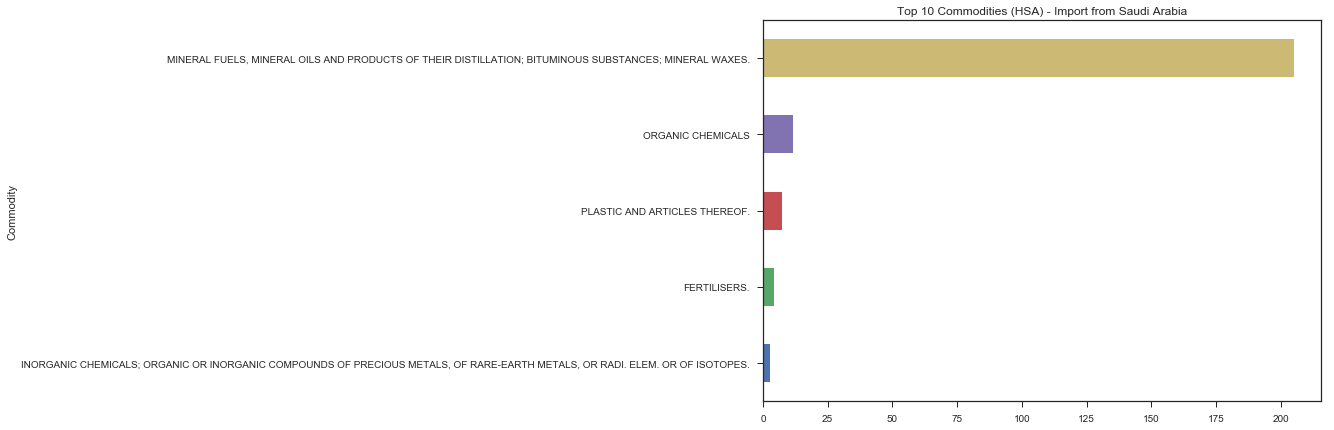

In [468]:
# Look at Saudi Arabia data
sab = df_import1[df_import1['country']=='SAUDI ARAB']
sab.head()

sab_c=sab.groupby(['Commodity'])['value'].sum().reset_index()
sab_c['value']=sab_c['value']/1000
sab_c.sort_values('value',ascending=False)

plt.figure(figsize = (10,7))
sab_c.groupby('Commodity')['value'].sum().nlargest(5).sort_values().plot('barh')
plt.title('Top 10 Commodities (HSA) - Import from Saudi Arabia');

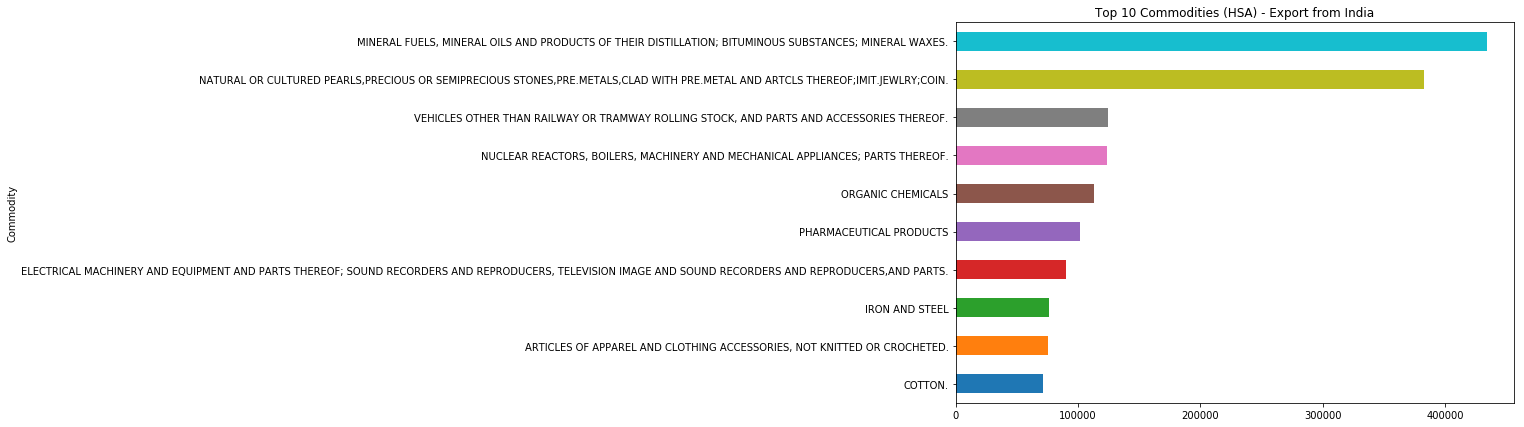

In [276]:
# 2) What are the top commodities that India getting profitted from?
plt.figure(figsize = (10,7))
df_export1.groupby('Commodity')['value'].sum().nlargest(10).sort_values().plot('barh')
plt.title('Top 10 Commodities (HSA) - Export from India');

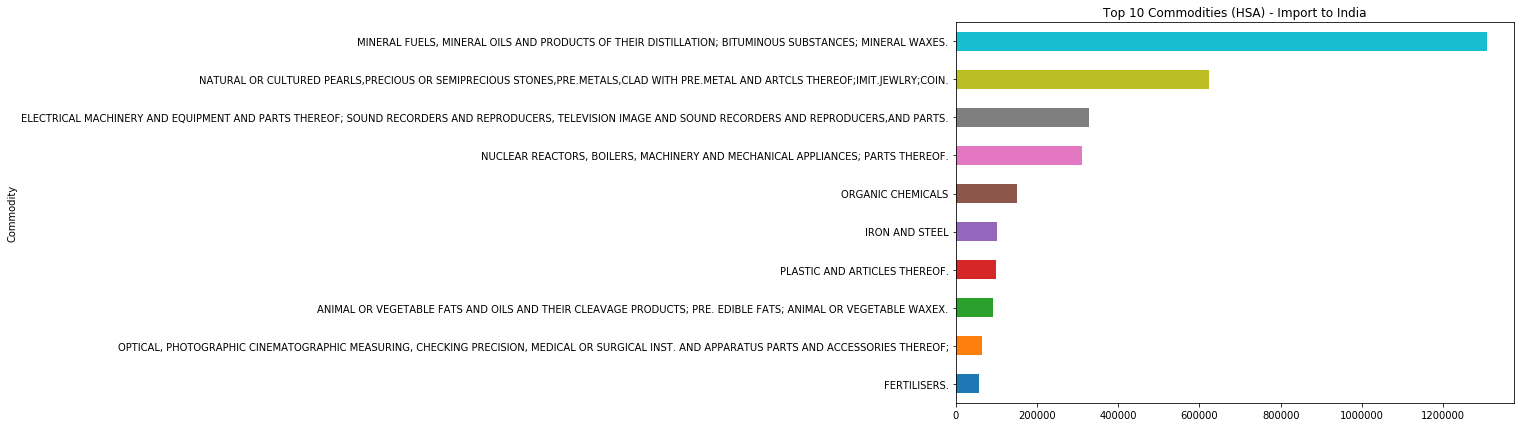

In [277]:
plt.figure(figsize = (10,7))
df_import1.groupby('Commodity')['value'].sum().nlargest(10).sort_values().plot('barh')
plt.title('Top 10 Commodities (HSA) - Import to India');

Based on the above charts, we can see that top exported commodities are as well part of the top imported commodities as well.
But the trade value is the difference between the Export and Import of these top commodities.

Vehicle other than railway or tramway and Cotton are the goods that are not part of top 10 import categories.

In [285]:
# 3) Progress over years (Since 2010 till 2018) on both the Import and Export front as well.
# Calculate the export and import value at year level and merge the data
year_wise=pd.merge(((df_import1.groupby('year')['value'].sum().reset_index()).rename(columns={'value':'Import_Value'})),
(((df_export1.groupby('year')['value'].sum().reset_index()).rename(columns={'value':'Export_Value'}))))
year_wise

,year,Import_Value,Export_Value
0,2010,369762.25,249801.18
1,2011,489311.81,305948.28
2,2012,490730.07,300384.32
3,2013,450192.99,314388.61
4,2014,448026.63,310321.02
5,2015,381000.97,262274.30
6,2016,384350.29,275835.27
7,2017,465574.02,303507.85
8,2018,514071.33,330058.64


In [286]:
year_wise['Import_Value'] = year_wise['Import_Value'] / 1000
year_wise['Export_Value'] = year_wise['Export_Value'] / 1000

In [287]:
year_wise

,year,Import_Value,Export_Value
0,2010,369.76225,249.80118
1,2011,489.31181,305.94828
2,2012,490.73007,300.38432
3,2013,450.19299,314.38861
4,2014,448.02663,310.32102
5,2015,381.00097,262.27430
6,2016,384.35029,275.83527
7,2017,465.57402,303.50785
8,2018,514.07133,330.05864


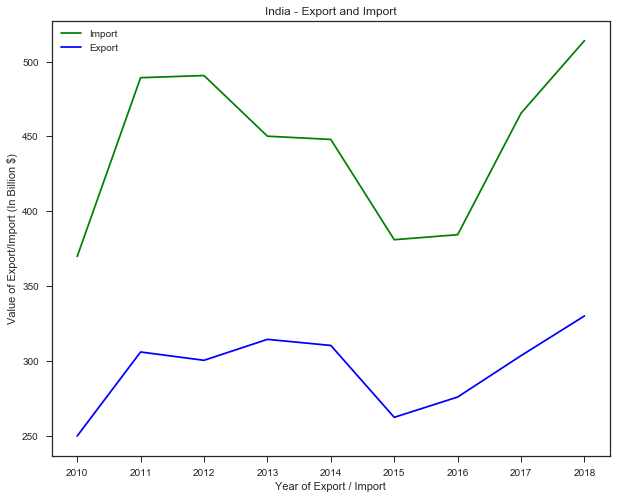

In [443]:
plt.figure(figsize=(10, 8))
plt.plot(year_wise['year'], year_wise['Import_Value'], 'g', label = 'Import')
plt.plot(year_wise['year'], year_wise['Export_Value'], 'b', label = 'Export')
plt.xlabel('Year of Export / Import'); plt.ylabel('Value of Export/Import (In Billion $)'); 
plt.title('India - Export and Import')
plt.legend();

With the help of above line chart, we can able to clearly see that India is importing goods which are having value larger than that of the export goods.

With 2014 being the election year there has been dip in the export but post that we can see clear upward trends

In [425]:
# Create data frames to have the data at country and type of business level
year_to_import=df_import1.groupby(['year','country'])['value'].sum().reset_index()
year_to_import['Type']='Import'
year_to_export=df_export1.groupby(['year','country'])['value'].sum().reset_index()
year_to_export['Type']='Export'
year_to_wise=year_to_export.append(year_to_import)
year_to_wise['Type'].value_counts()

Export    2064
Import    1939
Name: Type, dtype: int64

In [428]:
year_to_wise_top=pd.merge(year_to_wise,export_ctr,on='country',how='inner')
year_to_wise_top['value_x']=year_to_wise_top['value_x']/1000
year_to_wise_top

,year,country,value_x,Type,value_y
0,2010,BANGLADESH PR,3.24274,Export,55472.64
1,2011,BANGLADESH PR,3.78896,Export,55472.64
2,2012,BANGLADESH PR,5.14475,Export,55472.64
3,2013,BANGLADESH PR,6.16665,Export,55472.64
4,2014,BANGLADESH PR,6.45121,Export,55472.64
5,2015,BANGLADESH PR,6.03465,Export,55472.64
6,2016,BANGLADESH PR,6.81982,Export,55472.64
7,2017,BANGLADESH PR,8.61410,Export,55472.64
8,2018,BANGLADESH PR,9.20976,Export,55472.64
9,2010,BANGLADESH PR,0.44670,Import,55472.64


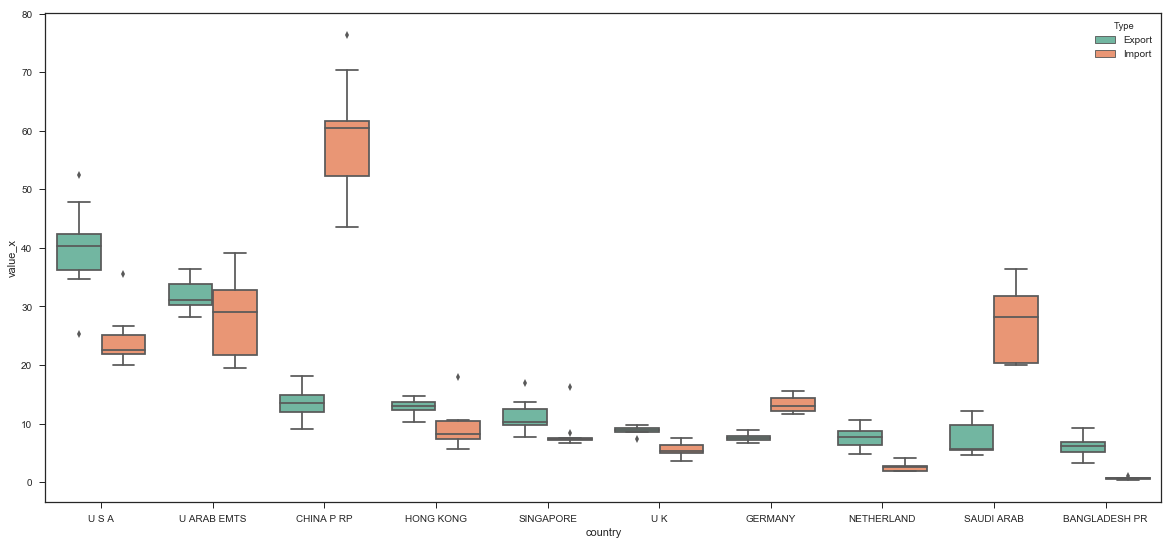

In [447]:
year_to_wise_top=year_to_wise_top.sort_values(['value_y','Type'],ascending=[False,True])
plt.figure(figsize=(20,9))
ax = sb.boxplot(x="country", y="value_x", hue="Type",data=year_to_wise_top, palette="Set2")
plt.show()